# Introduction to Jupyter Notebooks

## What is Jupyter Notebook?

An open-source web application that allows you to create and share documents with live code, equations, visualizations, and  text.

## Purpose and Benefits

- Facilitates interactive computing and data exploration.
- Supports multiple programming languages (e.g., Python, R, Julia).
- Data analysis pipelines for reproducible research.
- Compile publication quality figures

## Common workflows

- **Path A** Input data -> wrangle data -> test hypothesis -> output results
- **Path B** Input data -> wrangle data -> visualize results -> output figure

In [1]:
# Import the packages you are going to use
# Do this after you introduce your notebook in cell 1 with documentation
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Core Components of Jupyter Notebooks

### Notebook Interface

- **Code cells**: Where you write and execute code.
- **Markdown cells**: For adding explanations, text, and formatting.
- **Output cells**: Where the results of code execution are displayed.

_This is a markdown cell_


In [2]:
# This is a code cell
print("I am going to output this in an 'output cell'")

I am going to output this in an 'output cell'


### Kernel

- The computational engine that executes the code contained in a notebook.
- Supports multiple languages (Python, R, etc.).
- You can customize kernels using conda environments

_lets check out our current kernel_

In [3]:
! conda list

# packages in environment at /Users/waygr/miniconda3/envs/cpbs7601:
#
# Name                    Version                   Build  Channel
_r-mutex                  1.0.1               anacondar_1    conda-forge
aiohttp                   3.9.5           py311h05b510d_0    conda-forge
aiosignal                 1.3.1              pyhd8ed1ab_0    conda-forge
ansicolors                1.1.8              pyhd8ed1ab_0    conda-forge
anyio                     4.6.2.post1        pyhd8ed1ab_0    conda-forge
appnope                   0.1.4              pyhd8ed1ab_0    conda-forge
argon2-cffi               23.1.0             pyhd8ed1ab_0    conda-forge
argon2-cffi-bindings      21.2.0          py311h460d6c5_5    conda-forge
arrow                     1.3.0              pyhd8ed1ab_0    conda-forge
asttokens                 2.4.1              pyhd8ed1ab_0    conda-forge
async-lru                 2.0.4              pyhd8ed1ab_0    conda-forge
attrs                     24.2.0             pyh71513ae_0   

### Jupyter magic commands

`!` is an example of a jupyter magic command

- `!` grants access to the terminal directly in a code cell
- line magics
- cell magics

See for more details https://ipython.readthedocs.io/en/stable/interactive/magics.html

In [4]:
# Example line magic
%matplotlib inline

In [5]:
# Example line magic
%time

2 + 3

CPU times: user 3 μs, sys: 0 ns, total: 3 μs
Wall time: 10 μs


5

In [6]:
%%capture captured_content
print("This is an example showing jupyter cell magic.")

In [7]:
captured_content()

This is an example showing jupyter cell magic.


## Key Features

### Interactive Data Analysis

- Real-time code execution and immediate feedback.

### Rich Text Support

- Markdown and LaTeX for annotations and mathematical expressions.

$ x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a} $

### Visualization Integration

- Support for libraries like Matplotlib, Seaborn, Plotly for data visualization.

### Export Options

- Export notebooks to various formats: HTML, PDF, Markdown, etc.

## Example usage

In [8]:
flights = sns.load_dataset("flights")

In [9]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [10]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [11]:
flights.passengers.sum()

40363

In [12]:
flights.year.unique()

array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960])

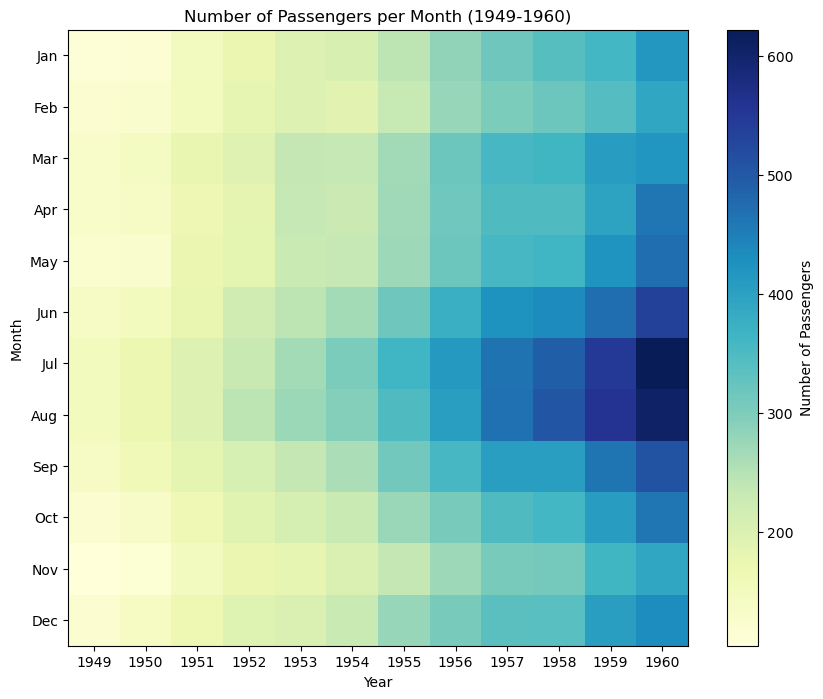

In [13]:
# Pivot the data to create a matrix suitable for a heatmap
flights_pivot = flights.pivot(index="month", columns="year", values="passengers")

# Create a heatmap plot using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(flights_pivot, cmap="YlGnBu", aspect="auto")

# Add color bar
plt.colorbar(label="Number of Passengers")

# Set the tick labels
plt.xticks(range(len(flights_pivot.columns)), flights_pivot.columns)
plt.yticks(range(len(flights_pivot.index)), flights_pivot.index)

# Add labels and title
plt.title("Number of Passengers per Month (1949-1960)")
plt.xlabel("Year")
plt.ylabel("Month")

# Save the plot as an image file
plt.savefig("flights_heatmap.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

## Closing tips

- Always make sure that you `restart and run all` cells after you have made all final changes.
  - Jupyter notebooks are dynamic and can be run out of order.
  - If your cells are not sequential, then there is no guarantee of reproducibility.
  - Variables could have been changed in cells that you no longer can see.
- When you're adding jupyter notebooks to github, it is also super helpful to add something called an `nbconverted` file.
  - You can save this in an `nbconverted` folder, and it will enable code reviewers to more easily comment on your code
  - Apply the command `jupyter nbconvert --to script jupyter_walkthrough.ipynb --output-dir nbconverted`
  - Run this every single time you make changes to the notebook.
  - It is helpful because any changes to this file is very hard to see in a pull request review. It makes it quite difficult to understand what has actually changed.
    - See https://github.com/WayScience/CPBS7601/pull/39 for an example of what I mean!